yt : [INFO     ] 2022-06-07 15:57:24,068 Parameters: current_time              = 1.0
yt : [INFO     ] 2022-06-07 15:57:24,069 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2022-06-07 15:57:24,070 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-07 15:57:24,070 Parameters: domain_right_edge         = [1.2 1.2 1.2]



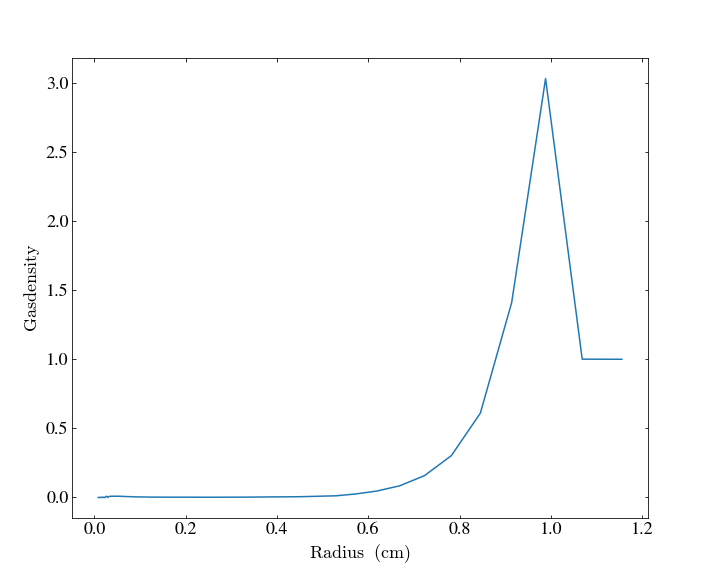

In [1]:
import yt
ds = yt.load("../../tests/plt16729")
my_sphere = ds.sphere([0., 0., 0.], 1.2)
plot = yt.ProfilePlot(my_sphere, "radius", [("boxlib", "gasDensity")], weight_field="ones")
plot.set_log(("boxlib", "gasDensity"), False)
plot.set_log("radius", False)

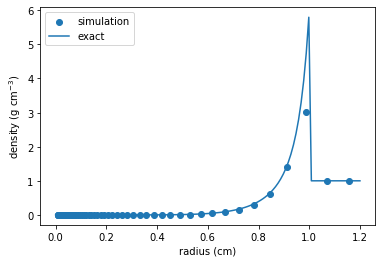

In [2]:
# see https://cococubed.com/research_pages/sedov.shtml
# for exact solutions

import numpy as np
i, x, den, ener, pres, vel, cs = np.loadtxt("spherical_standard_omega0p00.dat", unpack=True, skiprows=2)

profile = plot.profiles[0]
r = profile.x
rho = profile[("boxlib","gasDensity")]

import matplotlib.pyplot as plt
plt.scatter(r, rho, label='simulation')
plt.plot(x, den, label='exact')

plt.xlabel(r"radius (cm)")
plt.ylabel(r"density (g cm$^{-3}$)")
plt.legend(loc='best')

0.0 dimensionless 26844572019.077103 dimensionless


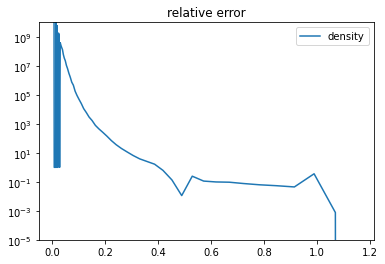

In [11]:
# interpolate exact solution
exact_at_sim = np.interp(r, x, den)
diff = np.abs(rho - exact_at_sim)
rel_diff = diff / exact_at_sim

print(np.min(rel_diff), np.max(rel_diff))
plt.plot(r, rel_diff, label='density')
plt.yscale('log')
plt.ylim(1e-5, 1e10)
plt.title('relative error')
plt.legend(loc='upper right')
plt.show()

0.0 dimensionless 1.6895137149977217 dimensionless


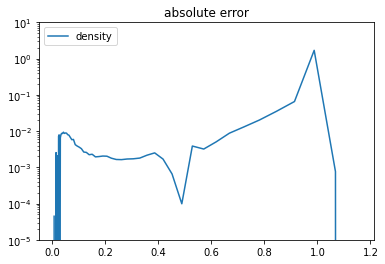

In [12]:
print(np.min(diff), np.max(diff))
plt.plot(r, diff, label='density')
plt.yscale('log')
plt.ylim(1e-5, 10)
plt.title('absolute error')
plt.legend(loc='upper left')
plt.show()